# Ford GoBike System Data Analysis
## by Mengting Tang

### Preliminary Wrangling

> This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area in February 2019.

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Load in dataset

In [7]:
# load the dataset and get a sense of it
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [259]:
print(df.shape)
print(df.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [262]:
# convert inappropriate datatypes 
pd.to_datetime(df.start_time)
pd.to_datetime(df.end_time)
df.start_station_id.astype('string')
df.end_station_id.astype('string')

0          13.0
1          81.0
2           3.0
3          70.0
4         222.0
          ...  
183407    324.0
183408     66.0
183409    277.0
183410    216.0
183411     37.0
Name: end_station_id, Length: 183412, dtype: string

In [263]:
# check duplicates
df.duplicated().sum()

0

In [264]:
# check and drop missing values
df.dropna(inplace = True)

In [265]:
df.shape

(174952, 16)

In [266]:
# descriptive statistics for numeric variables 
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


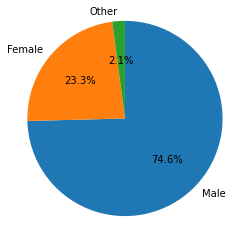

In [406]:
# take a look at the gender makeup of all users
sorted_count = df.member_gender.value_counts()
plt.pie(sorted_count, labels = sorted_count.index, autopct = '%1.1f%%', startangle = 90, counterclock = False)
plt.axis('square');

### What is the structure of your dataset?

> After wrangling, there are 174,952 entries of bike use, with features including duration time, start station, end station, bike ID, user type, customer birth year and gender.  

### What is/are the main feature(s) of interest in your dataset?

> I'm mainly interested in the correlation between the number of trips and time, the duration of trips, the usage difference between a subcriber and a customer as well as user demographics.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Based on my interest, features including duration, start time, end time, user type and the birth year of users would be of help for my investigation.

## Univariate Exploration 1

> I'll start by looking at the distribution of the duration of trips with a histogram.

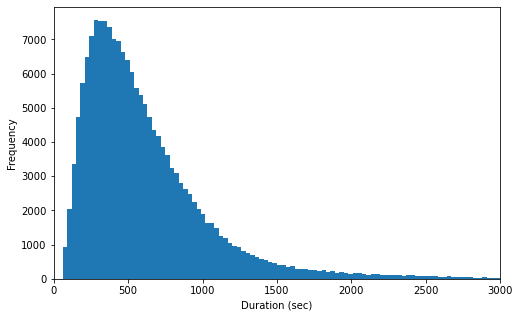

In [267]:
# start by looking at distribution of the duration of trips
bins = np.arange(0, df.duration_sec.max()+30, 30)
plt.figure(figsize = [8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlim((0, 3000))
plt.xlabel('Duration (sec)')
plt.ylabel('Frequency');

### Observation
> A right-skewed, long-tailed plot is presented, showing that most trips took somewhere between 300 to 800 seconds, namely 5 to 16 minutes. 
Also, duration in seconds makes it hard to visualize, thus, I'm going to convert it to duration in minutes and conduct a logarithmic analysis.

In [10]:
# Converting the trip durations from seconds to minutes 
df['duration_min'] = df.duration_sec.div(60)

In [11]:
df.dropna(inplace = True)

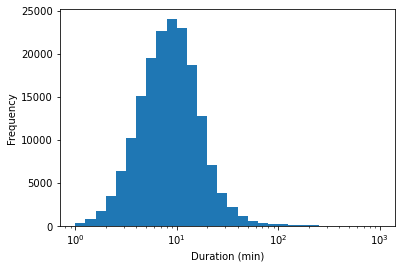

In [12]:
# Logarithmic transformation
bins = 10 ** np.arange(0, 3+0.1, 0.1)
plt.hist(data = df, x = 'duration_min', bins = bins)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.xlabel('Duration (min)')
plt.ylabel('Frequency')
plt.xscale('log');

### Observation

> This plot also shows that it's the most common to ride the bike for around 10 minutes. 
Next, I'm going to add other variables to investigate correlations.


## Univariate Exploration 2

> Next, I'll look into the demographics of all users.

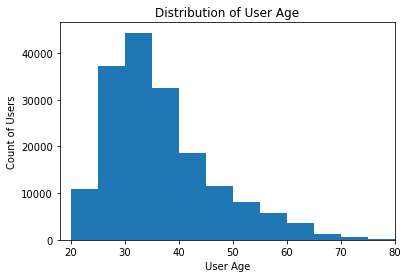

In [288]:
# age distribution in all users
df['age'] = 2021 - df.member_birth_year
bins = np.arange(0, df.age.max()+5, 5)
plt.hist(data = df, x = 'age', bins = bins);
plt.xlim(18, 80)
plt.xlabel('User Age')
plt.ylabel('Count of Users')
plt.title('Distribution of User Age');


### Observation 
> According to the right-skewed histogram, the majority of users lie between 25 and 40 years old, with a decreasing trend as the user age increases.

## Univariate Exploration 3

> Then, let's investigate during what time of day people ride bikes the most frequently.

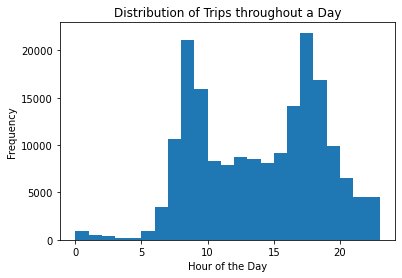

In [289]:
# distribution of trips throughout a day
bins = np.arange(0, df.hour.max()+1, 1)
plt.hist(data = df, x = 'hour', bins = bins)
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Distribution of Trips throughout a Day');

### Observation
> The plot shows a bimodal trend, with 8:00 and 18:00 being the two peaks with the most trips, indicating that people tend to rent bikes at these two times the most frequently.

## Bivariate Exploration 1

> First, I'll explore during what time of day people ride a bike for the longest period of time.

In [290]:
# extract "hour" from the datetime column and form a new one
df['hour'] = pd.to_datetime(df['start_time']).dt.hour

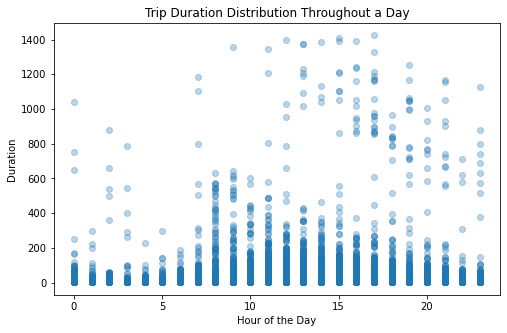

In [291]:
# Plotting duration in hour against hour of the day.
plt.figure(figsize = [8, 5])
plt.scatter(data = df, x = 'hour', y = 'duration_min', alpha = 0.3)
plt.xlabel('Hour of the Day')
plt.ylabel('Duration')
plt.title('Trip Duration Distribution Throughout a Day');

### Observation
> It's indicated by the scatter plot that people generally tend to ride the bike for less than 200 minutes regardless of what time of day, while it's clear that longer durations start to appear more from around 13:00 to 23:00. 


## Bivariate Exploration 2

> Here, let's explroe the relationship between user type and trip duration.

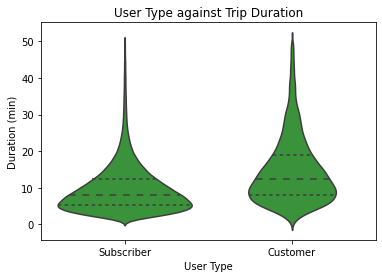

In [307]:
# user type against duration
base_color = sb.color_palette()[2]
sb.violinplot(data = df.query('duration_min < 50'), x = 'user_type', y = 'duration_min', inner = 'quartile', color = base_color)
plt.xlabel('User Type')
plt.ylabel('Duration (min)')
plt.title('User Type against Trip Duration');


### Observation
> As the violinplot indicates, suscribers seem to ride the bikes more often with shorter duration, with a median of around 9 minutes, while customers tend to ride the bikes for longer periods of time, with a median of around 13 minutes. This could be explained by their respective usage patterns – subscribers tend to ride bikes for more day-to-day, routine activities, while customers might ride bikes for tourism purposes.

## Bivariate Exploration 3

> Then, I'll look at whether gender plays a part in trip duration.

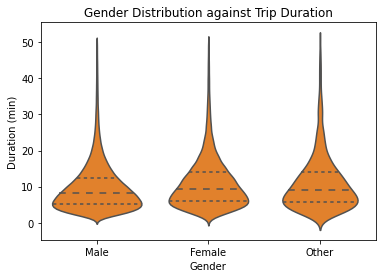

In [303]:
# gender against duration
base_color = sb.color_palette()[1]
sb.violinplot(data = df.query('duration_min < 50'), x = 'member_gender', y = 'duration_min', 
              inner = 'quartile', color = base_color)
plt.xlabel('Gender')
plt.ylabel('Duration (min)')
plt.title('Gender Distribution against Trip Duration');

### Observation
> There doesn't seem to be conspicuous difference when it comes to gender against trip duration. Three gender categories all show a similar median, roughly 10 minutes.

## Multivariate Exploration 1

> To start with, I'm going to look at whether user type has anything to do with what time of day and how long a bike is used.

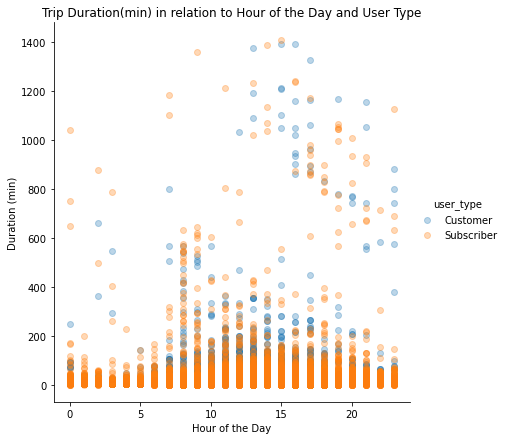

In [390]:
# multivariate scatter plot with two variables and "user_type" as hue

g = sb.FacetGrid(data = df, hue = 'user_type', height = 6)
g.map(plt.scatter, 'hour', 'duration_min', alpha = 0.3)
g.add_legend()
plt.title('Trip Duration(min) in relation to Hour of the Day and User Type')
plt.xlabel('Hour of the Day')
plt.ylabel('Duration (min)');

### Observation

> We can conclude from the plot that subscribers contribute a lot more trips than customers do, probably showing that customer loyalty does lead to more traffic. 
Also, it's clear that compared with customers, subscribers make up most of the shorter trips, and customers tend to use the bike for longer periods of time. 

## Multivariate Exploration 2

> Next, I'll further explore how trip duration interacts with demographics, including gender and age groups. 

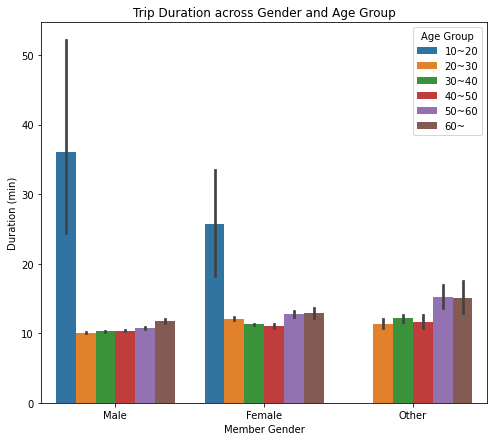

In [374]:
# Relationship between trip duration, gender and age
plt.figure(figsize = [8, 7])
df['age_group'] = df['age'].apply(lambda x: '10~20' if 10 < x <= 20
                                        else '20~30' if 20 < x <= 30
                                        else '30~40' if 30 < x <= 40
                                        else '40~50' if 40 < x <= 50
                                        else '50~60' if 50 < x <= 60
                                        else '60~')

g = sb.barplot(data = df.query('duration_min < 120').sort_values(by = 'age_group'), x = 'member_gender', y = 'duration_min', hue = 'age_group');
h, l = g.get_legend_handles_labels()
g.legend(h, l, title = 'Age Group');
plt.xlabel('Member Gender')
plt.ylabel('Duration (min)')
plt.title('Trip Duration across Gender and Age Group');


### Observation


> It's clear that age groups from 20 to 60~ don't show conspicuous differences in terms of trip duration, and in terms of gender difference, male customers between 10 and 20 years old tend to ride the bikes for a longer period of times than other gender types but meanwhile with a much wider room for errors.

### Surprising finding

> To my surprise, people above the age of 50 ride the bikes for no shorter duration than the other younger age groups other than 10~20. One possibility is that their relatively lower speed led to the longer duration.

## Conclusion

> In February 2019
> 1. The average trip duration of all bike trips is 704 seconds, roughly 11.7 minutes.
> 2. The majority of users lie between 25 and 40 years old, with male users taking up roughly 3/4.
> 3. Users tend to ride the bikes at 8:00 and 18:00 the most.
> 4. During a day, users tend to ride bikes more often from noon to before midnight.
> 5. Subsribers contribute more trip, while customers generally ride bikes for a longer duration than subscribers do, indicating their respective riding purposes.
> 6. Gender doesn't play much of a role in terms of trip duration.
> 7. Users between 10 to 20 years old ride bikes for longer periods of time, followed by users in their 50s and above.


In [412]:
df.to_csv('201902-fordgobike-tripdata1.csv', index = False)